In [5]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from algorithms import *
from data_gen import *
from spectrum_gen import *
from visualizations import *
from analysis import *



In [2]:
adata =  read_all_scn()
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


In [ ]:
def evaluate_multiple_scn_clusters(adata,cluster_list, cluster,type_genes,r_genes,gene_regu=0,en_regu=0,filter_regu=0):
    adata_tmp = (adata[adata.obs['louvain'].isin(cluster_list)])
    adata_tmp = sort_data_crit(adata=adata_tmp.copy(), crit='CT',
                             crit_list=['02', '06', '10', '14', '18', '22'])
    sc.pp.highly_variable_genes(adata_tmp, n_top_genes=3000)#min_mean=0.0125, max_mean=3, min_disp=0.5)
    for gene in r_genes: # Make sure that the rhytmic and type markers are not filtered out
        adata_tmp.var.highly_variable[gene]=True
    for gene in type_genes:
        adata_tmp.var.highly_variable[gene]=True
    adata_tmp = adata_tmp[:, adata_tmp.var.highly_variable]
    all_plots_scn(adata_tmp,title= cluster+ " - raw data, " )
    adata_tmp.write("SCN/" + cluster+"_raw" +".h5ad")
    D = filter_cyclic_genes(adata_tmp.X, regu=gene_regu, iterNum=200)
    D = np.identity(D.shape[0])-D
    adata_en = adata_tmp.copy()
    adata_en.X = (adata_en.X).dot(D)
    F = filter_full(adata_en.X, regu=en_regu, iterNum=50)
    adata_en.X = adata_en.X * F
    adata_en.write("SCN/" + cluster+"_en" +".h5ad")
    all_plots_scn(adata_en,title= cluster+ " - enhanced signal, " )
    F = filter_cyclic_full_line(adata_tmp.X, regu=filter_regu, iterNum=50)
    adata_tmp.X = adata_tmp.X * F
    adata_tmp.write("SCN/" + cluster+"_filtered" +".h5ad")
    all_plots_scn(adata_tmp,title= cluster+ " - filtered signal, " )
    pass


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CT' as categorical


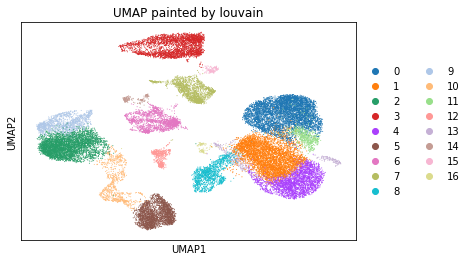

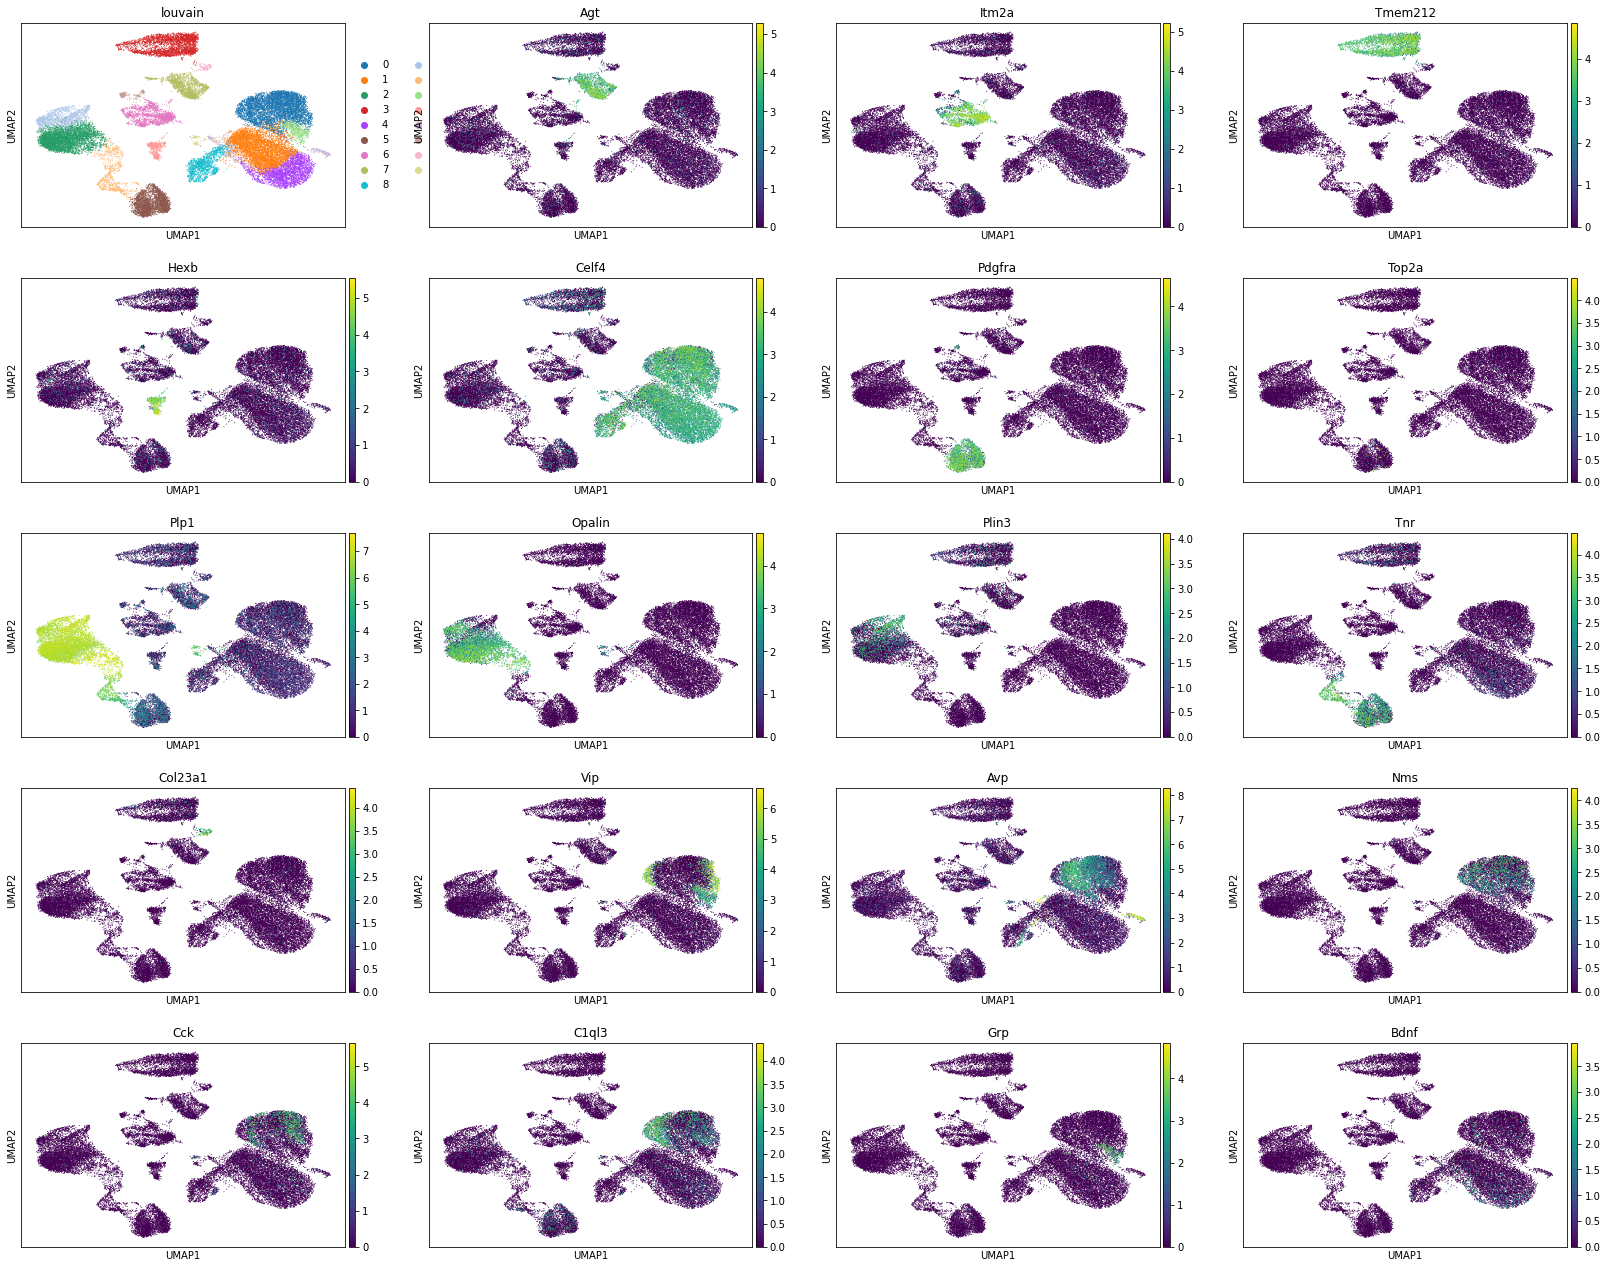

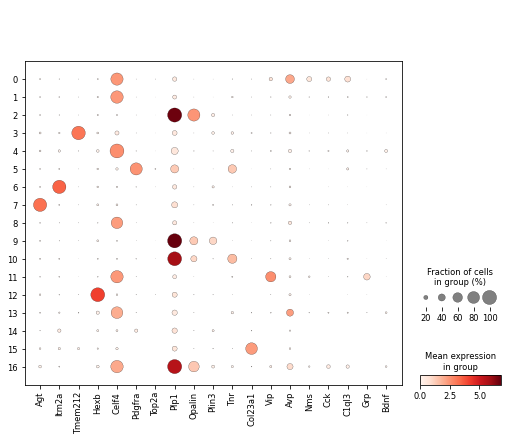

In [4]:
sc.tl.louvain(adata, resolution=0.7)
sc.tl.umap(adata)
sc.pl.umap(adata, color='louvain' , title=("UMAP painted by louvain"))
marker_genes = ['Agt', 'Itm2a','Tmem212','Hexb','Celf4','Pdgfra','Top2a','Plp1','Opalin','Plin3','Tnr','Col23a1','Vip','Avp','Nms','Cck','C1ql3','Grp','Bdnf']
sc.pl.umap(adata, color=['louvain']+marker_genes)
sc.pl.dotplot(adata, marker_genes, groupby='louvain')

In [5]:
new_cluster_names = [
    'Neurons1', 'Neurons2','Oligodendrocytes1','Ependymal',
    'Neurons3','NG2','Endothelial', 'Astrocytes',
    'Neurons4','Oligodendrocytes2','Oligodendrocytes3','Neurons5',
    'Microglia', 'Neurons6','not_real','Tanycytes',
    'Neurons7']
adata.rename_categories('louvain', new_cluster_names)


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [20]:
r_genes = ['Bmal1','Dbp','Nr1d1','Per2','Ciart','Nr1d2','Per1','Tef','Ahsa2','Cct8a','Hsp90aa1','Hsp90ab1','Hsph1']
r_genes2 = ['Dbp','Nr1d1','Per2','Ciart','Nr1d2','Per1','Tef','Ahsa2','Hsp90aa1','Hsp90ab1','Hsph1']
type_genes = ['Agt', 'Itm2a','Tmem212','Hexb','Celf4','Pdgfra','Top2a','Plp1','Opalin','Plin3','Tnr','Col23a1','Vip','Avp','Nms','Cck','C1ql3','Grp','Bdnf']

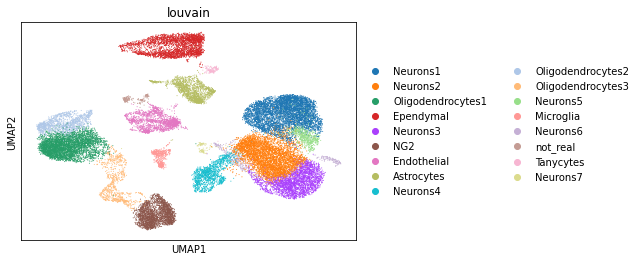

In [7]:
sc.pl.umap(adata, color=['louvain'])
orig_adata = adata.copy()


Trying to set attribute `.uns` of view, copying.
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1050: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1052: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True


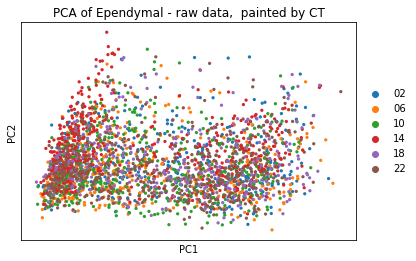

Iteration number: 1function value= 518.4682813659332


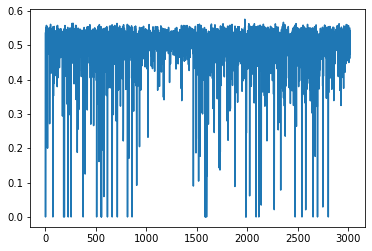

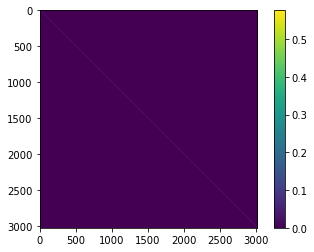

Iteration number: 26function value= 691.8361367101575


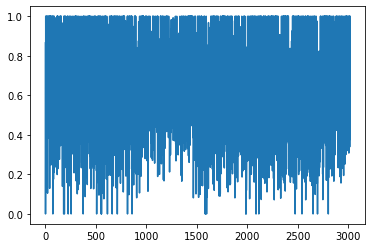

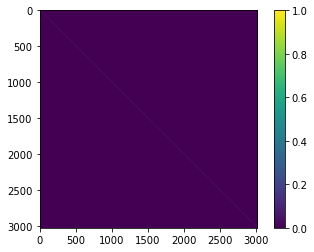

Iteration number: 51function value= 711.513521667943


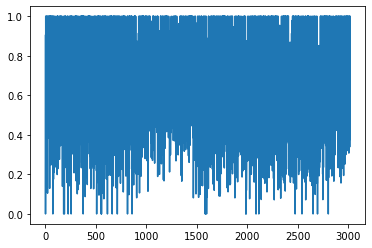

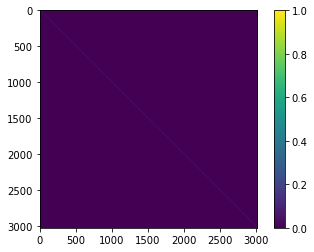

Iteration number: 76function value= 713.7149274261935


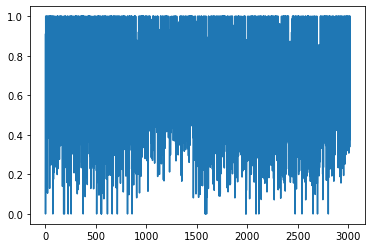

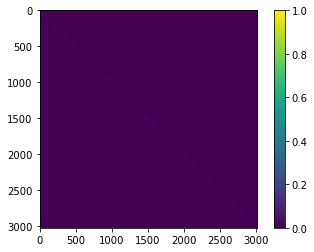

Iteration number: 101function value= 714.077847147581


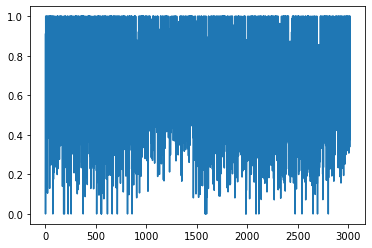

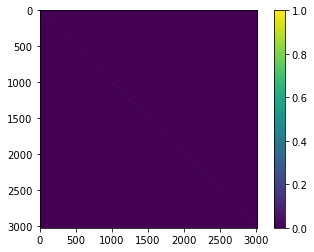

Iteration number: 126function value= 714.1549504236934


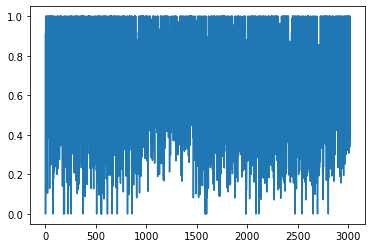

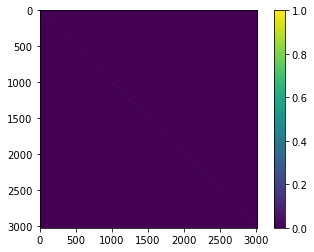

Iteration number: 151function value= 714.1749161438984


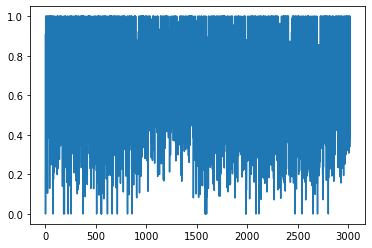

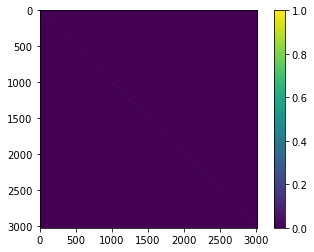

Iteration number: 176function value= 714.1809552117033


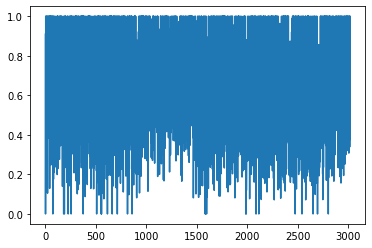

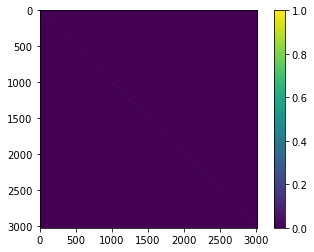

Iteration number: 1 function value: 15017.31170255128
Iteration number: 26 function value: 96950.4918273099


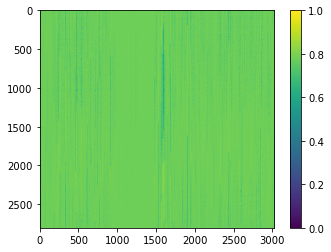

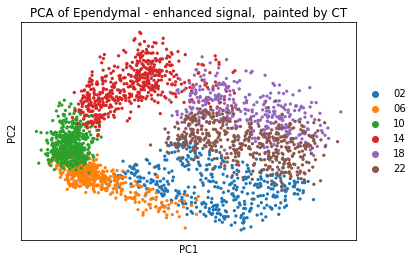

starting filtering
25th Iteration    Loss :: 905.1082544603277 gradient :: 33.84618146409995
50th Iteration    Loss :: 559.26558682566 gradient :: 13.112255899119601


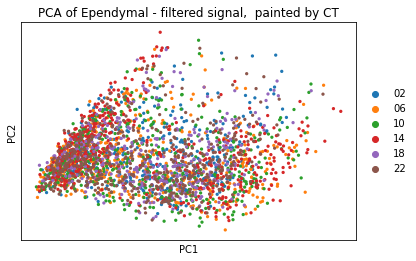

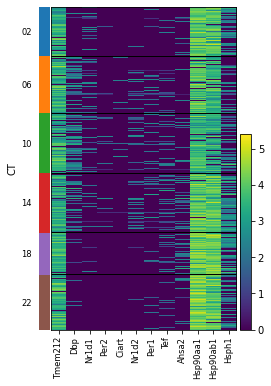

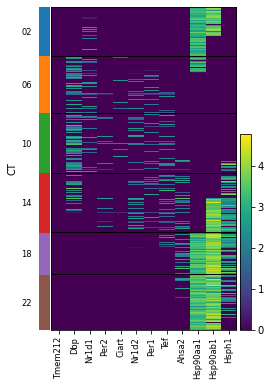

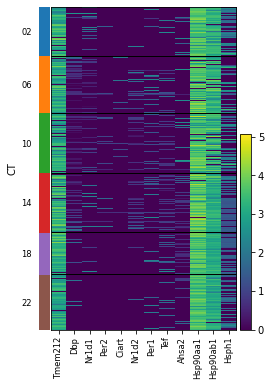

In [9]:
evaluate_single_scn_cluster(adata=adata,cluster='Ependymal',type_genes=type_genes,r_genes=r_genes,gene_regu=0.8,en_regu=0.05,filter_regu=0)
gene_list =['Tmem212'] + r_genes2
heatmap_crit(gene_list, 'Ependymal', 'CT')


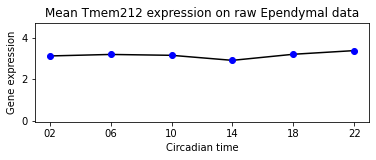

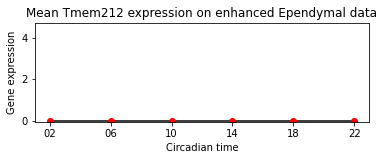

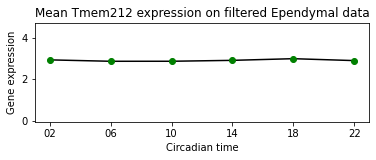

In [10]:
#plt_mean_gene_group(clusters,gene,up_lim=1.5, down_lim=-0.05)
#plt_mean_gene_group(clusters,'Nr1d1',up_lim=0.5, down_lim=-0.05)
plt_mean_gene('Ependymal','Tmem212',up_lim=4.7, down_lim=-0.05)

Trying to set attribute `.uns` of view, copying.
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1050: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1052: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True


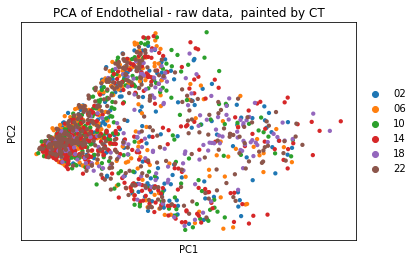

Iteration number: 1function value= 553.0587067611247


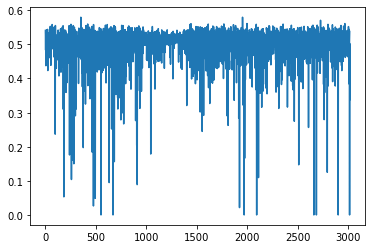

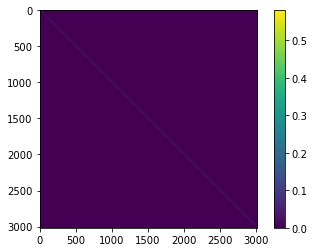

Iteration number: 26function value= 671.5166487086201


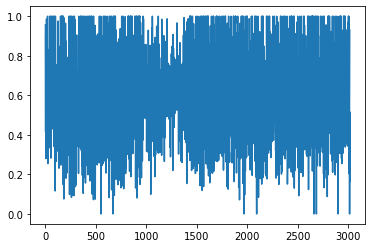

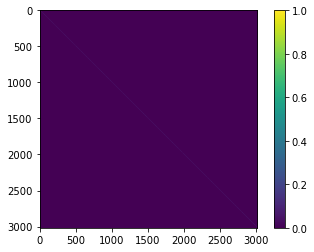

Iteration number: 51function value= 687.5586701114087


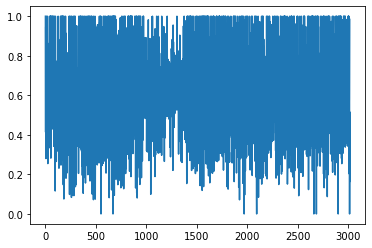

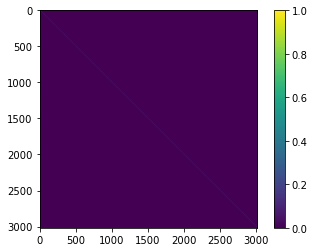

Iteration number: 76function value= 689.3470107561927


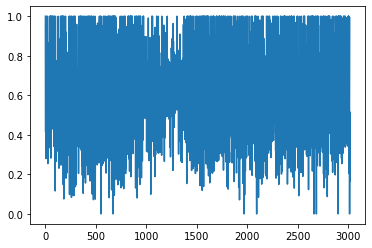

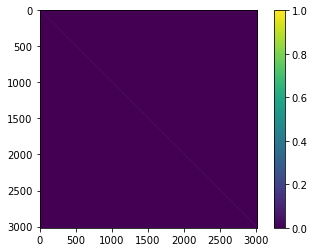

Iteration number: 101function value= 689.6364105162834


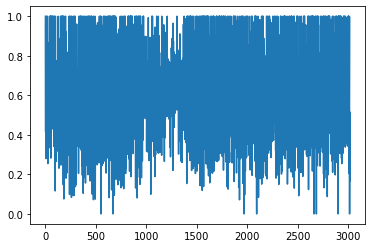

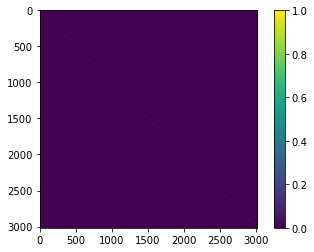

Iteration number: 126function value= 689.6967817025779


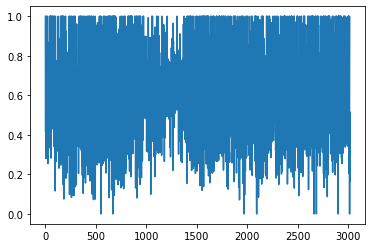

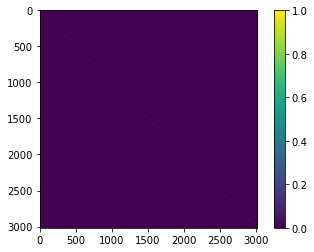

Iteration number: 151function value= 689.7122556286399


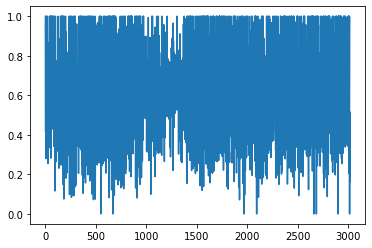

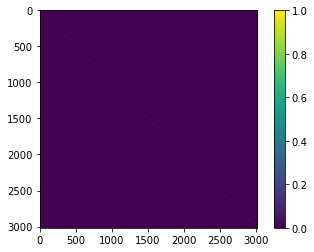

Iteration number: 176function value= 689.7169233468112


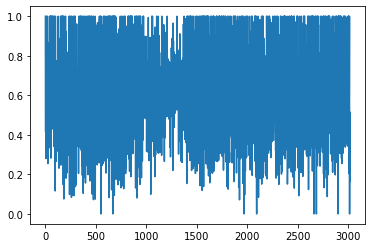

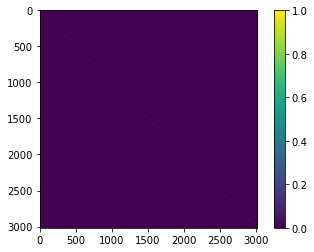

Iteration number: 1 function value: 4553.401683396062
Iteration number: 26 function value: 23637.557371130893


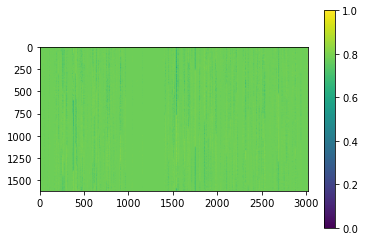

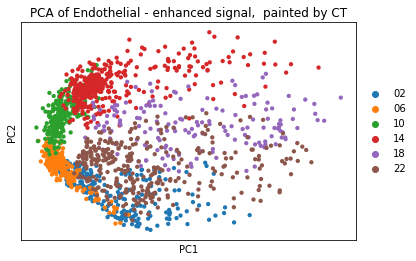

starting filtering
25th Iteration    Loss :: 449.70794724030196 gradient :: 10.259203826840212
50th Iteration    Loss :: 300.9829598831834 gradient :: 12.23185062620196


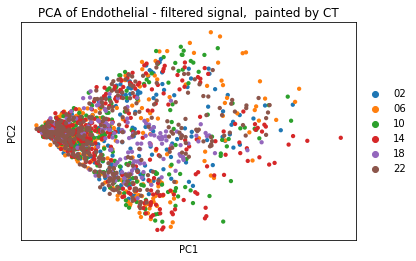

In [11]:
evaluate_single_scn_cluster(adata=adata,cluster='Endothelial',type_genes=type_genes,r_genes=r_genes,gene_regu=0.8,en_regu=0.05,filter_regu=0)


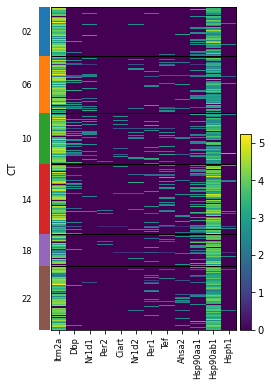

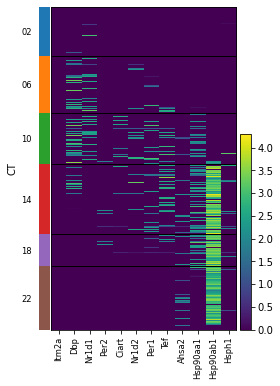

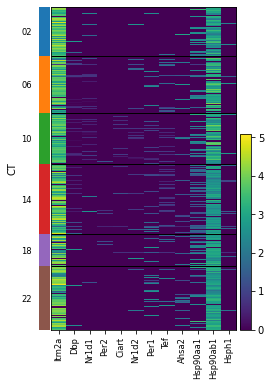

In [12]:
gene_list =['Itm2a'] + r_genes2
heatmap_crit(gene_list, 'Endothelial', 'CT')


Trying to set attribute `.uns` of view, copying.
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1050: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1052: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True


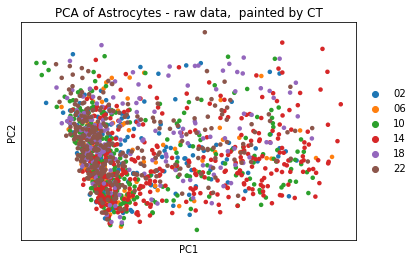

Iteration number: 1function value= 474.4922812583499


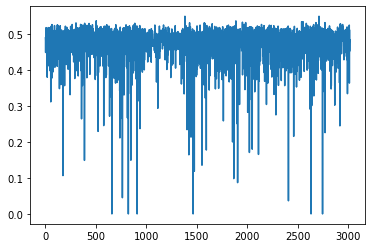

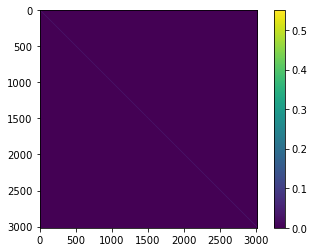

Iteration number: 26function value= 294.25277276437475


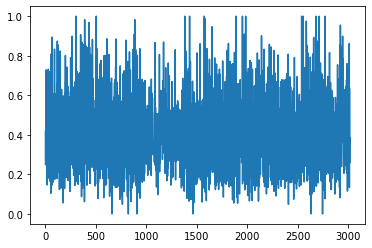

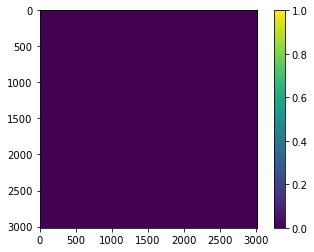

Iteration number: 51function value= 299.2638483434325


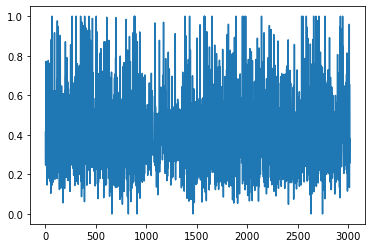

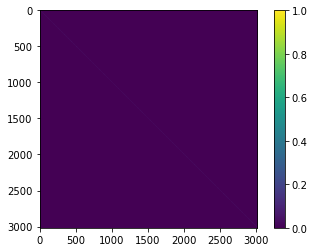

Iteration number: 76function value= 300.88473984167354


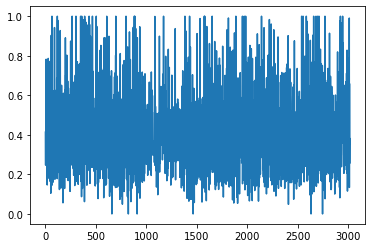

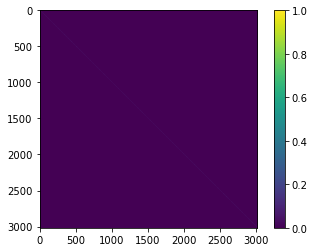

Iteration number: 101function value= 301.3589328228949


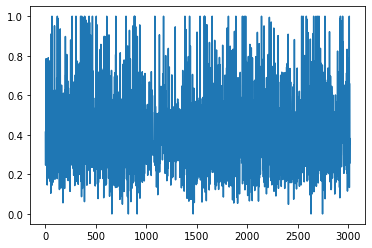

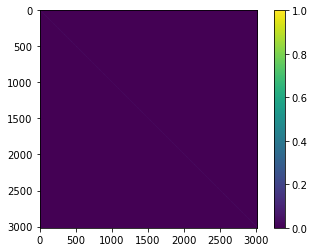

Iteration number: 126function value= 301.5178722720859


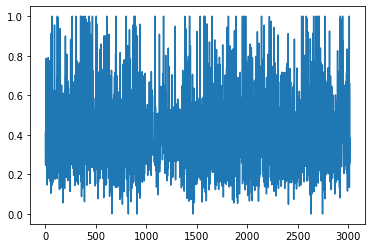

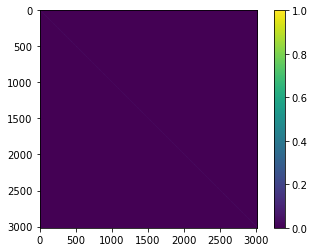

Iteration number: 151function value= 301.57885910464023


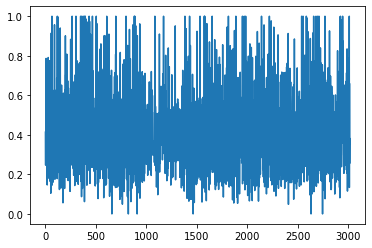

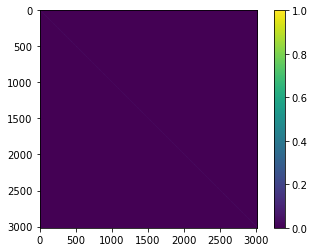

Iteration number: 176function value= 301.6045455413509


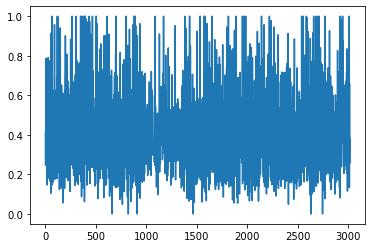

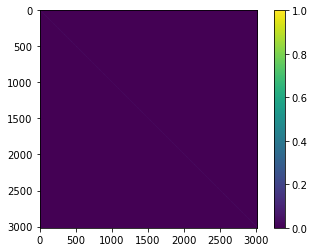

Iteration number: 1 function value: 2036.2015435420487
Iteration number: 26 function value: 9785.977244998121


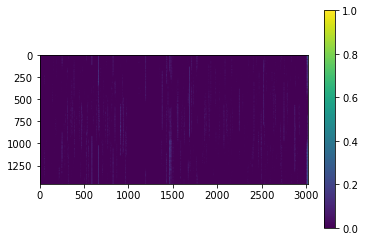

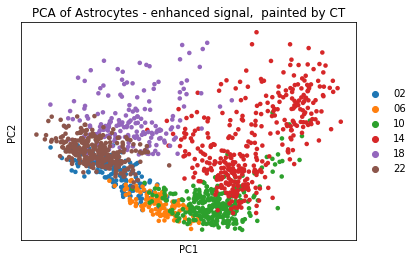

starting filtering
25th Iteration    Loss :: 422.0380155840903 gradient :: 9.8951783395365
50th Iteration    Loss :: 265.96448066537494 gradient :: 5.972660965357526


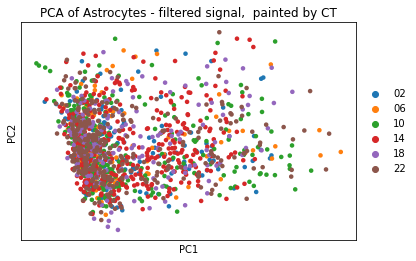

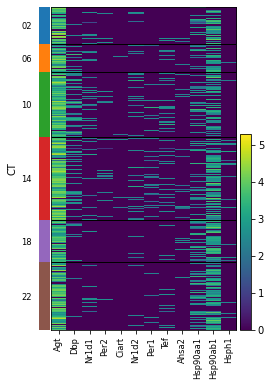

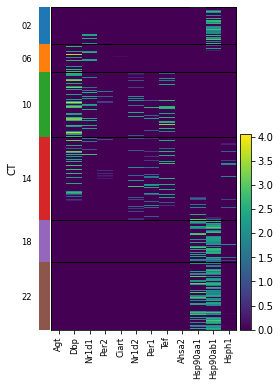

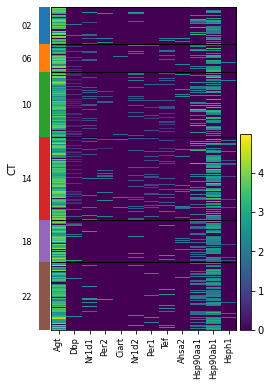

In [13]:
evaluate_single_scn_cluster(adata=adata,cluster='Astrocytes',type_genes=type_genes,r_genes=r_genes,gene_regu=0.5,en_regu=0.25,filter_regu=0)
gene_list =['Agt'] + r_genes2
heatmap_crit(gene_list, 'Astrocytes', 'CT')


Trying to set attribute `.uns` of view, copying.
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1050: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1052: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True


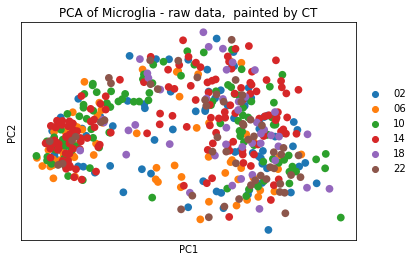

Iteration number: 1function value= 468.1561506745795


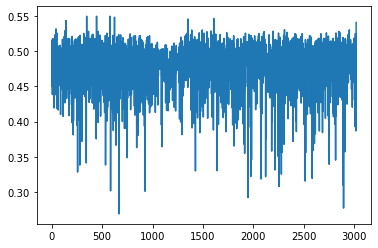

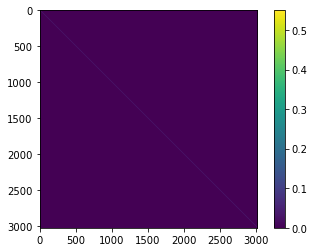

Iteration number: 26function value= 302.25642315928735


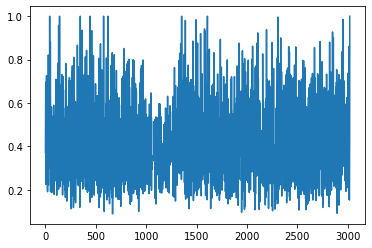

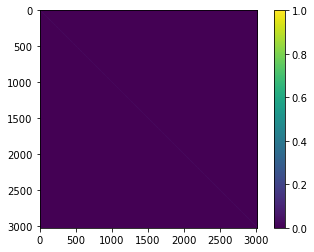

Iteration number: 51function value= 306.7959192841285


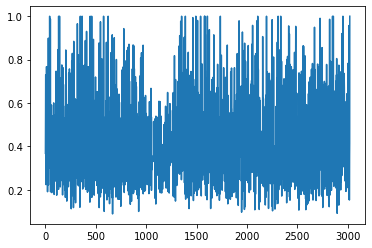

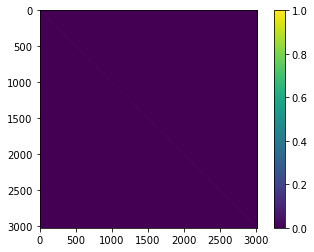

Iteration number: 76function value= 308.31086186275587


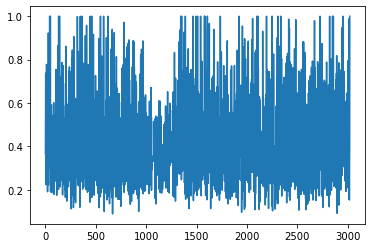

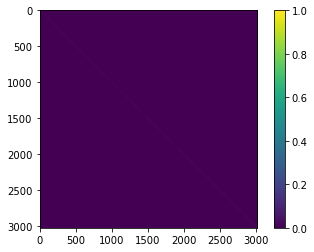

Iteration number: 101function value= 308.7533805522702


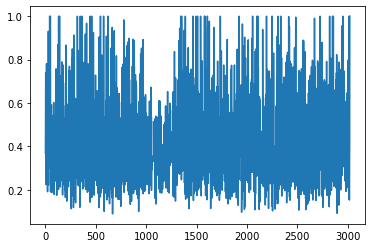

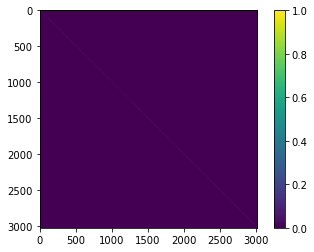

Iteration number: 126function value= 308.899998167965


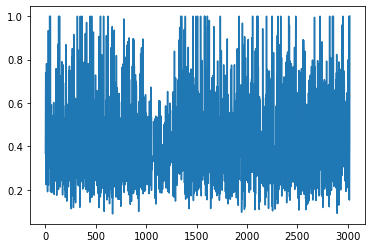

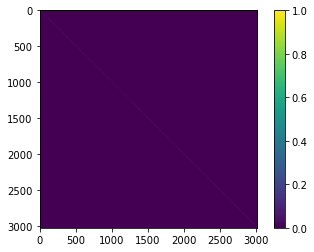

Iteration number: 151function value= 308.9553625919557


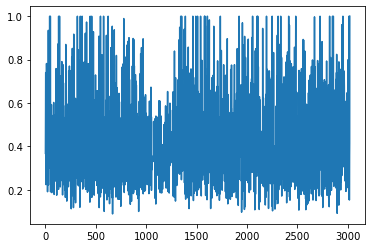

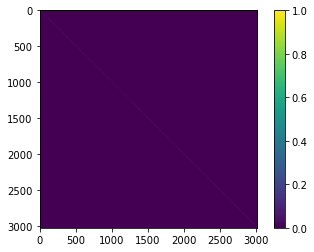

Iteration number: 176function value= 308.9791489368865


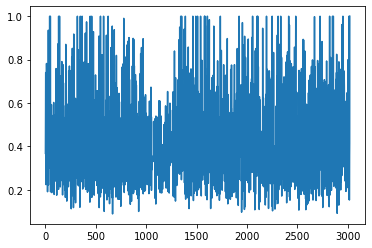

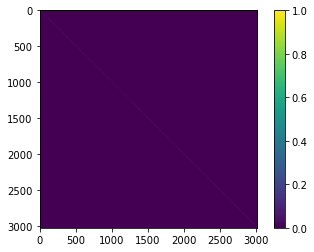

Iteration number: 1 function value: 485.99864091307205
Iteration number: 26 function value: 1103.6043457289227


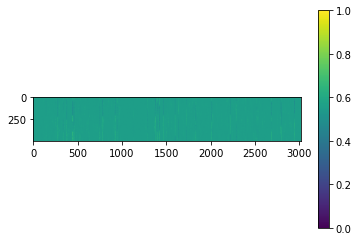

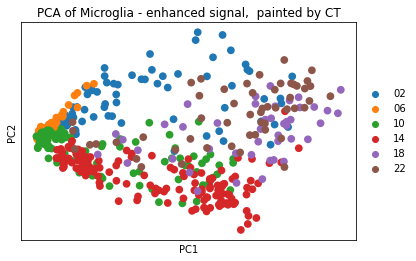

starting filtering
25th Iteration    Loss :: 124.88539067375541 gradient :: 2.9614461880789644
50th Iteration    Loss :: 77.09768580533193 gradient :: 2.105995055195995


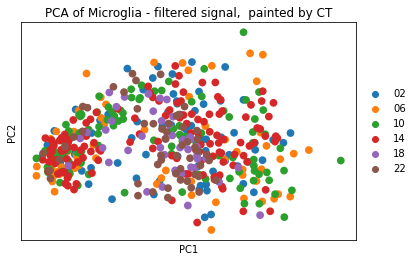

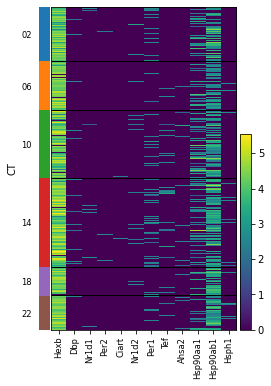

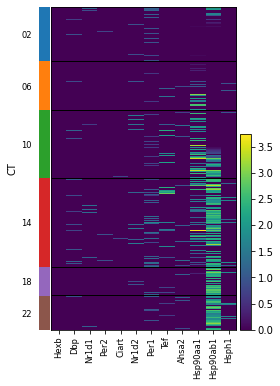

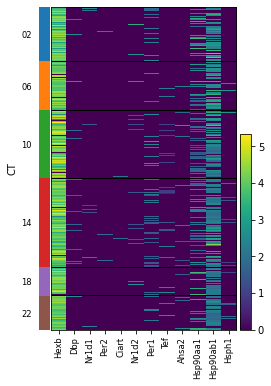

In [14]:
evaluate_single_scn_cluster(adata=adata,cluster='Microglia',type_genes=type_genes,r_genes=r_genes,gene_regu=0.5,en_regu=0.1,filter_regu=0)
gene_list =['Hexb'] + r_genes2
heatmap_crit(gene_list, 'Microglia', 'CT')


Trying to set attribute `.uns` of view, copying.
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1050: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1052: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True


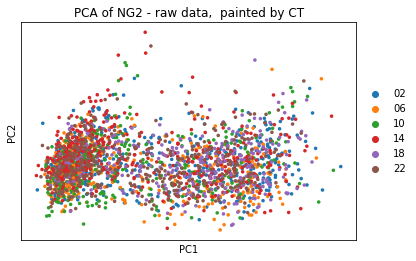

Iteration number: 1function value= 612.9585077716761


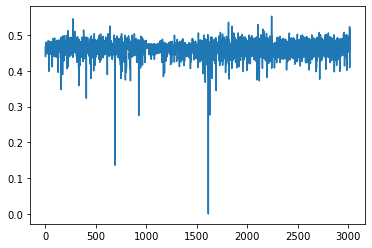

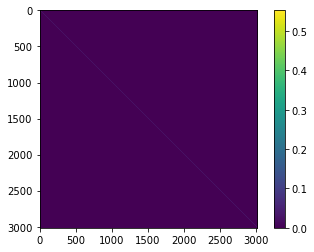

Iteration number: 26function value= 294.84926782182225


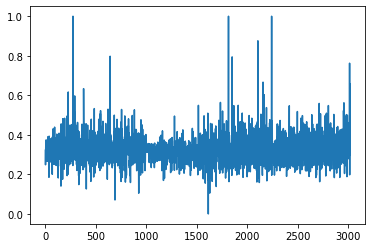

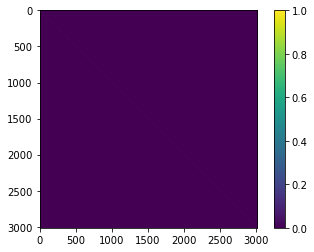

Iteration number: 51function value= 293.0387672596714


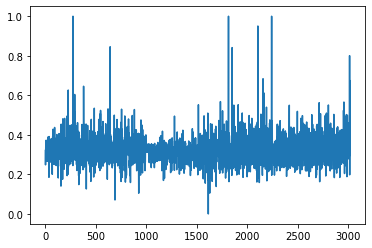

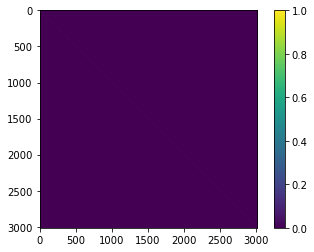

Iteration number: 76function value= 293.03151815986973


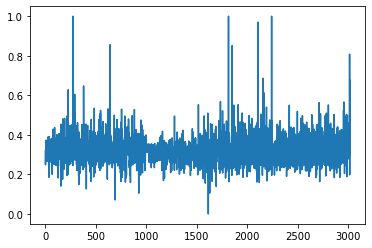

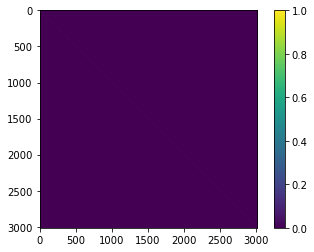

Iteration number: 101function value= 293.038491439897


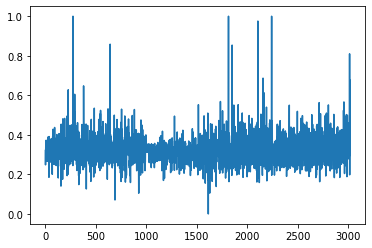

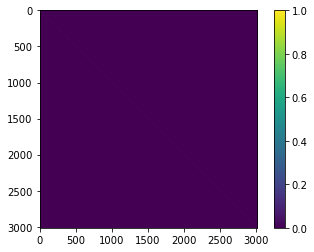

Iteration number: 126function value= 293.0409833919674


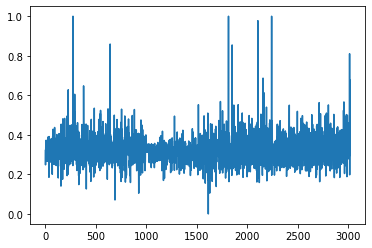

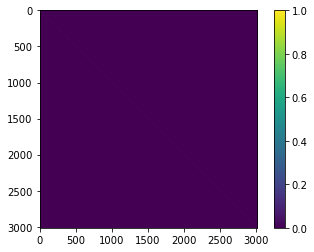

Iteration number: 151function value= 293.0418782485385


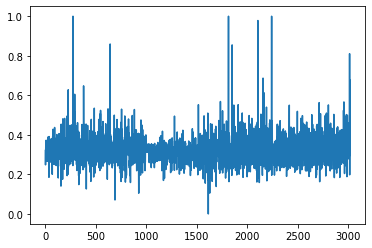

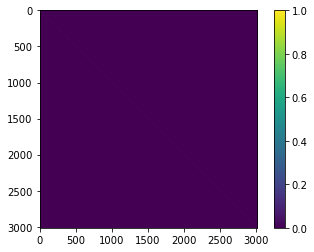

Iteration number: 176function value= 293.0422328963581


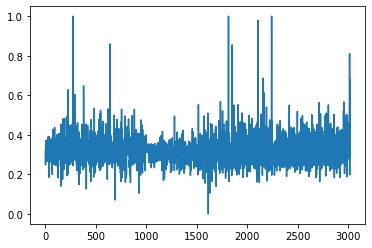

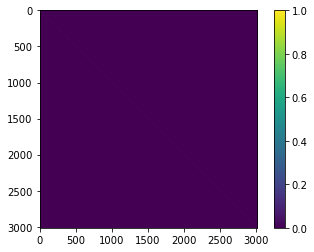

Iteration number: 1 function value: 2111.916114169997
Iteration number: 26 function value: 3006.0643913373774


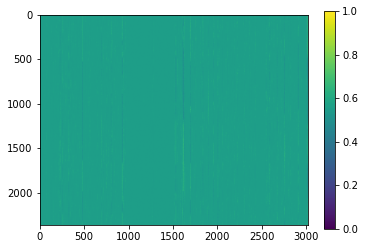

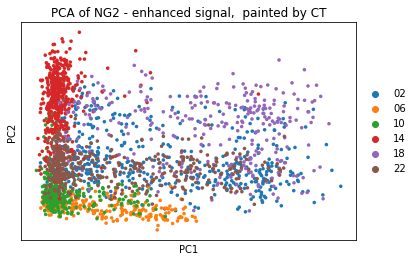

starting filtering
25th Iteration    Loss :: 715.9300793001271 gradient :: 7.466944890696207
50th Iteration    Loss :: 405.54577955945655 gradient :: 6.48056725838735


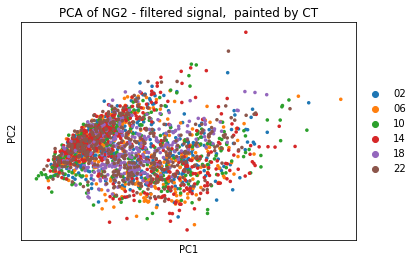

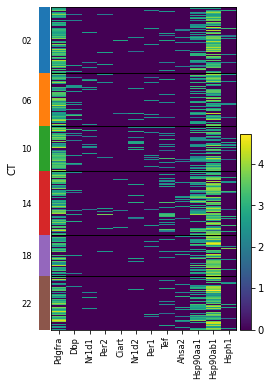

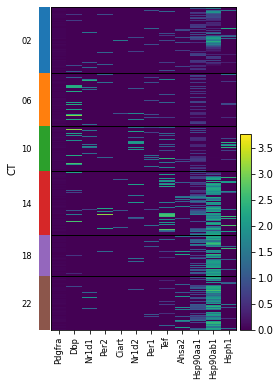

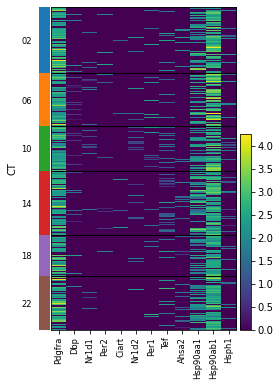

In [15]:
evaluate_single_scn_cluster(adata=adata,cluster='NG2',type_genes=type_genes,r_genes=r_genes,gene_regu=0.6,en_regu=0.1,filter_regu=0)
gene_list =['Pdgfra'] + r_genes2
heatmap_crit(gene_list, 'NG2', 'CT')


Trying to set attribute `.uns` of view, copying.
<ipython-input-3-f595ebe38421>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True
<ipython-input-3-f595ebe38421>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True


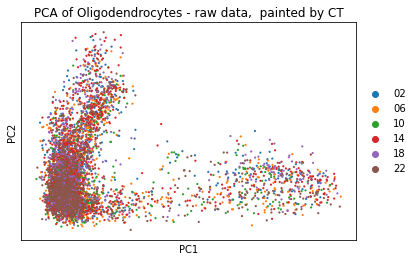

Iteration number: 1function value= 143.53106785165474


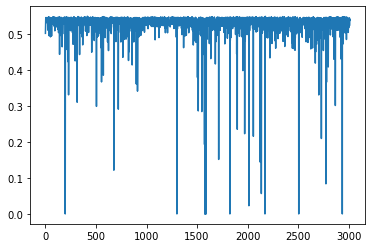

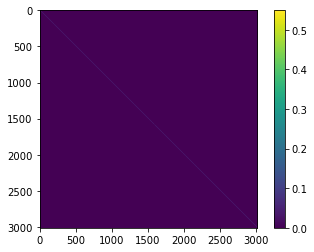

Iteration number: 26function value= 348.0057544136357


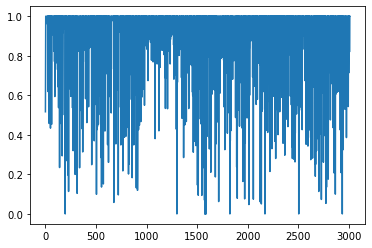

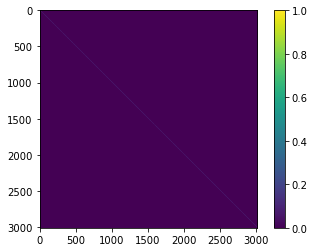

Iteration number: 51function value= 365.375656261023


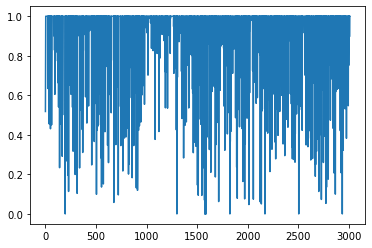

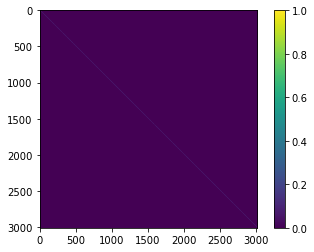

Iteration number: 76function value= 368.6141114377716


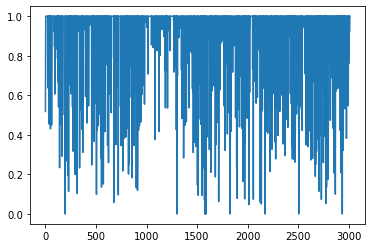

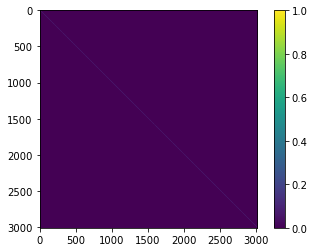

Iteration number: 101function value= 369.5204423305679


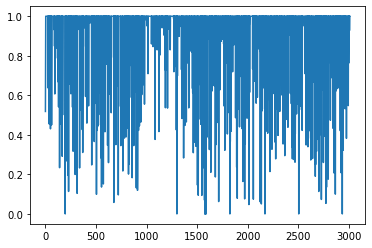

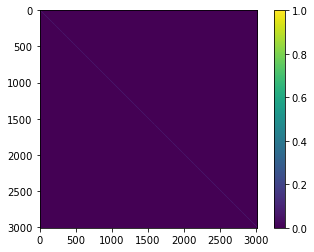

Iteration number: 126function value= 369.83539637285105


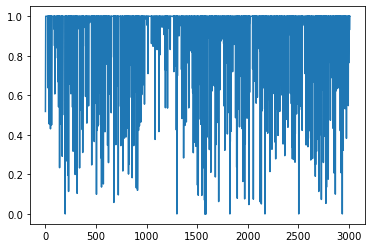

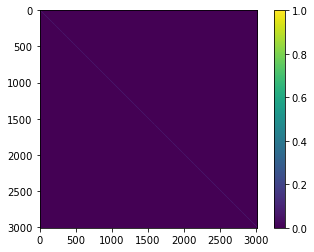

Iteration number: 151function value= 369.96068144084467


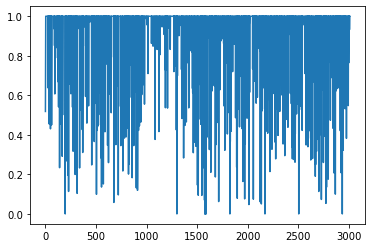

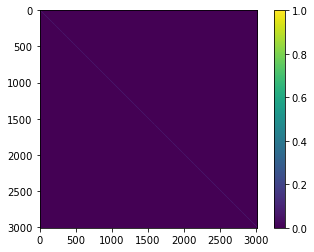

Iteration number: 176function value= 370.0166788379


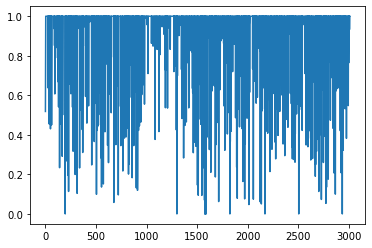

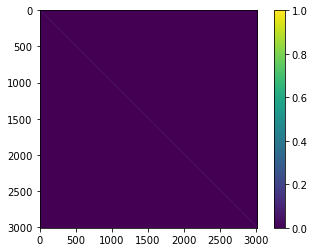

Iteration number: 1 function value: 1028.4037052443541
Iteration number: 26 function value: 11360.821304874957


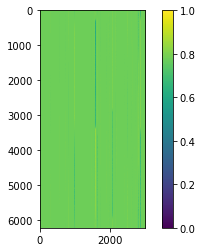

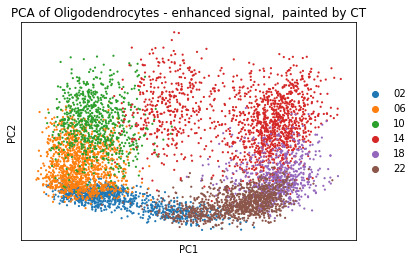

starting filtering
25th Iteration    Loss :: 608.7843844839239 gradient :: 40.16928750888359
50th Iteration    Loss :: 316.0152953316614 gradient :: 11.48509891836575


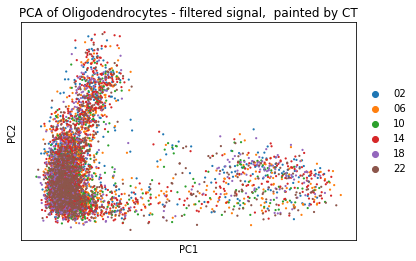

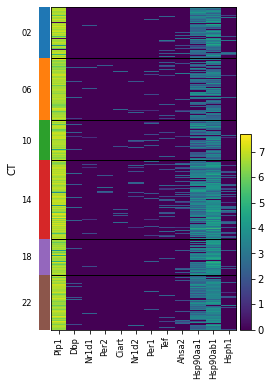

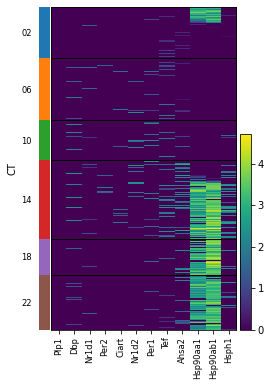

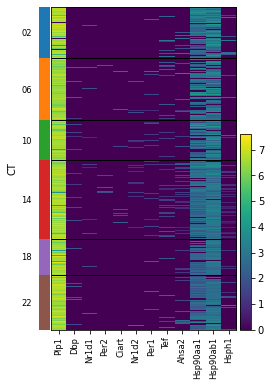

In [18]:

evaluate_multiple_scn_clusters(adata=adata,cluster_list=['Oligodendrocytes1','Oligodendrocytes2','Oligodendrocytes3'],cluster='Oligodendrocytes',type_genes=type_genes,r_genes=r_genes,gene_regu=0.5,en_regu=0.05,filter_regu=0)
gene_list =['Plp1'] + r_genes2
heatmap_crit(gene_list, 'Oligodendrocytes', 'CT')


Trying to set attribute `.uns` of view, copying.
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1050: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1052: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True


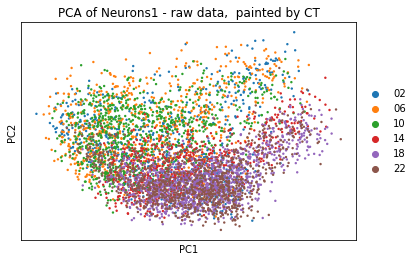

Iteration number: 1function value= 493.94025512366716


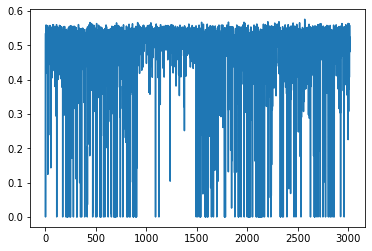

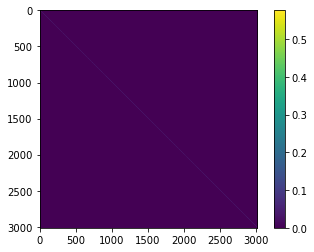

Iteration number: 26function value= 651.8808637208549


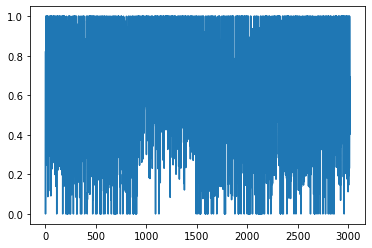

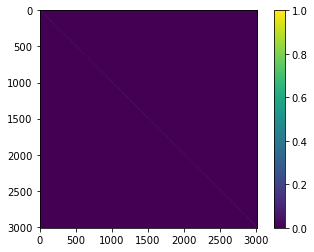

Iteration number: 51function value= 668.6606967815658


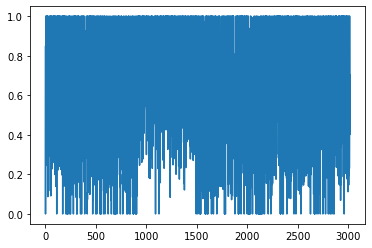

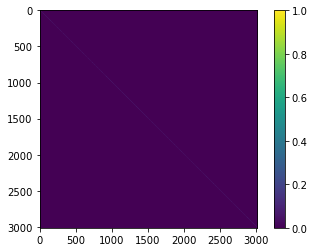

Iteration number: 76function value= 670.4935279125323


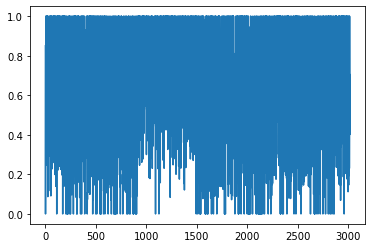

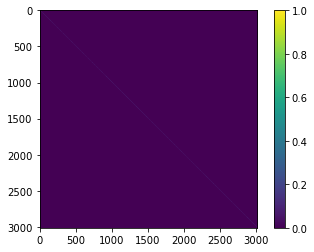

Iteration number: 101function value= 670.7852583583087


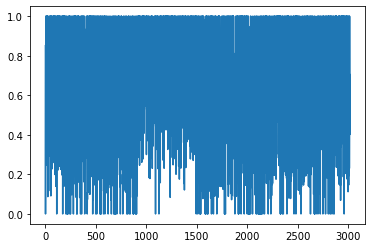

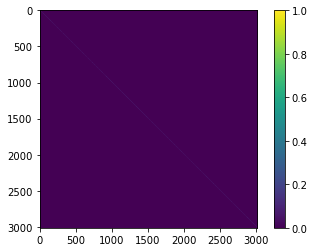

Iteration number: 126function value= 670.8470751871419


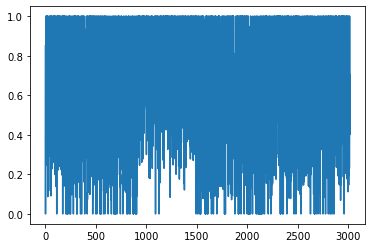

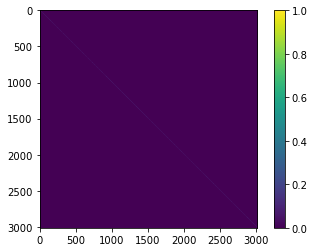

Iteration number: 151function value= 670.8629647553706


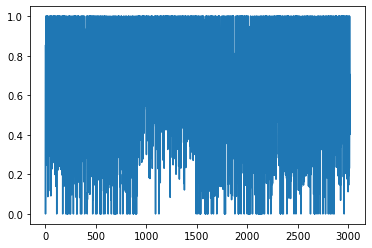

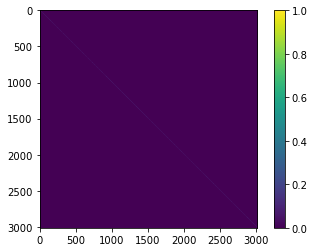

Iteration number: 176function value= 670.8677653225286


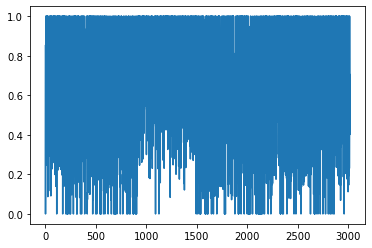

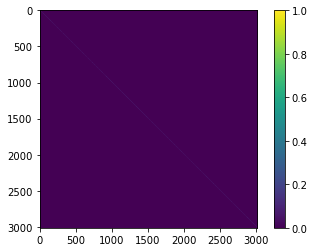

Iteration number: 1 function value: 110408.6123363867
Iteration number: 26 function value: 356639.33515155816


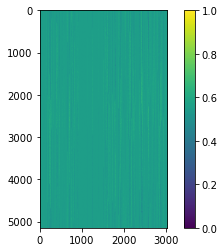

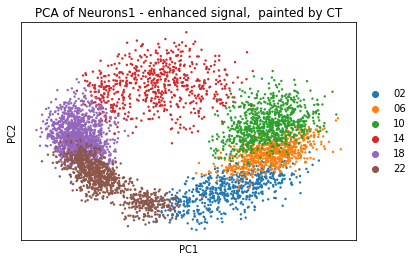

starting filtering
25th Iteration    Loss :: 2604.341491662657 gradient :: 61.145359614299146
50th Iteration    Loss :: 1401.694262113924 gradient :: 33.36171621083624


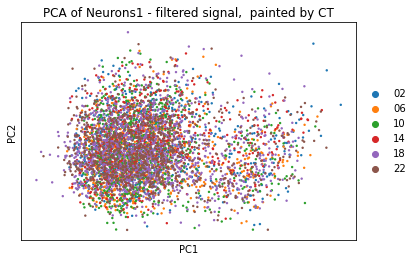

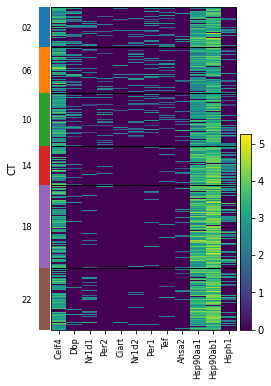

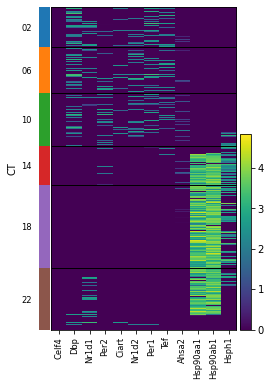

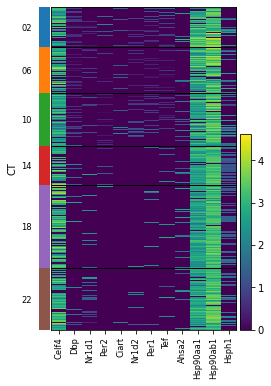

In [19]:
evaluate_single_scn_cluster(adata=adata,cluster='Neurons1',type_genes=type_genes,r_genes=r_genes,gene_regu=0.8,en_regu=0.1,filter_regu=0)
gene_list =['Celf4'] + r_genes2
heatmap_crit(gene_list, 'Neurons1', 'CT')


Trying to set attribute `.uns` of view, copying.
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1050: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1052: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True


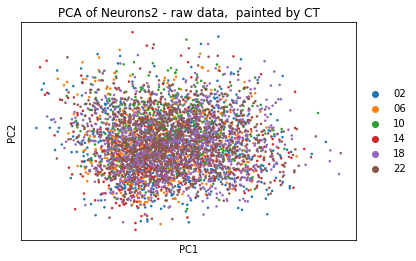

Iteration number: 1function value= 331.3049184282061


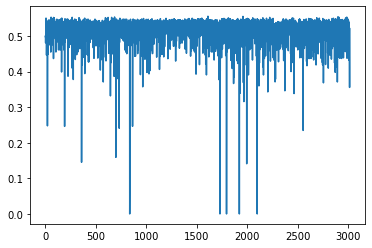

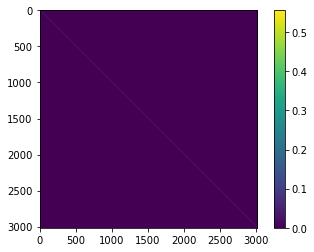

Iteration number: 26function value= 536.1388687284237


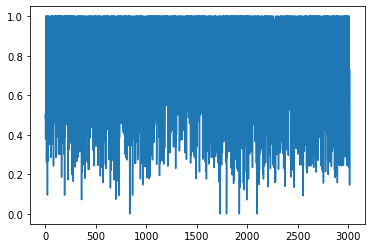

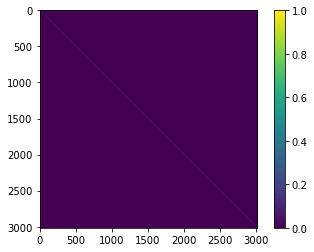

Iteration number: 51function value= 563.3761909767312


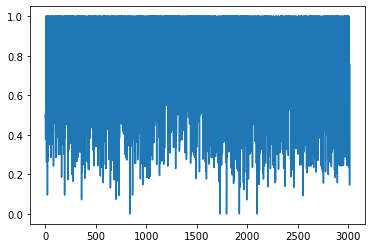

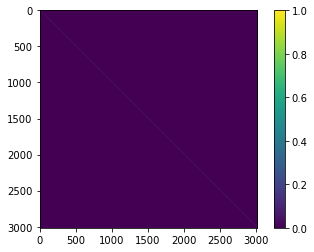

Iteration number: 76function value= 568.0679289843907


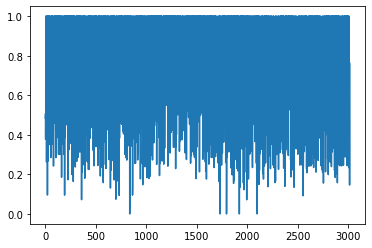

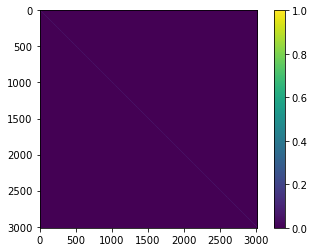

Iteration number: 101function value= 569.188292349483


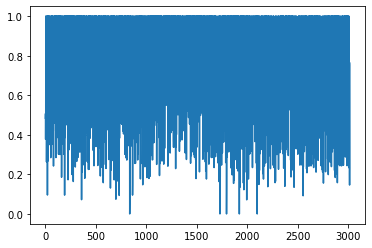

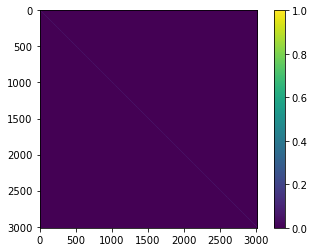

Iteration number: 126function value= 569.515702117801


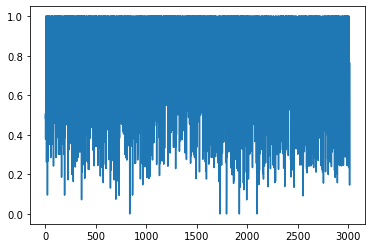

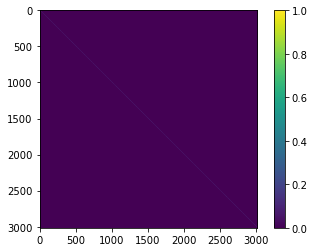

Iteration number: 151function value= 569.629138914733


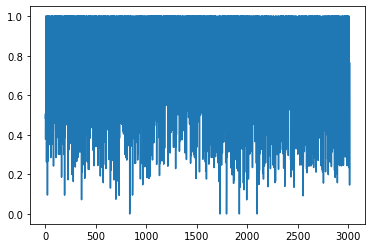

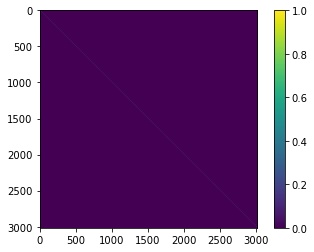

Iteration number: 176function value= 569.6734514880181


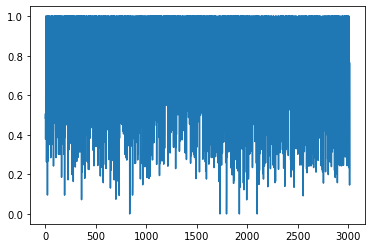

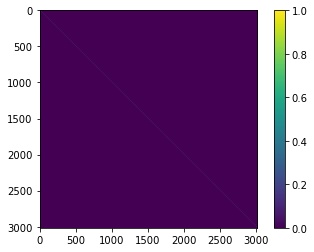

Iteration number: 1 function value: -296.6459736124173
Iteration number: 26 function value: 1645.348235515568


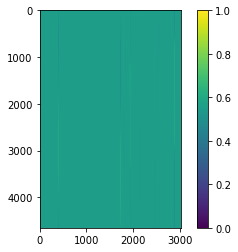

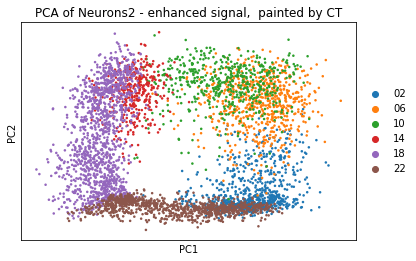

starting filtering
25th Iteration    Loss :: 1735.7645271414144 gradient :: 81.70630653520759
50th Iteration    Loss :: 992.017185073812 gradient :: 37.0356243602958


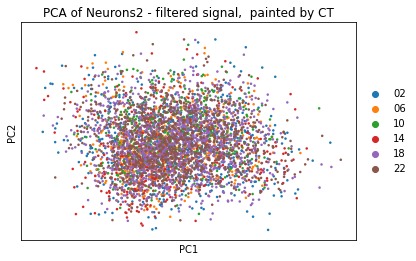

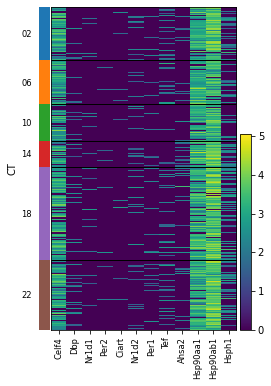

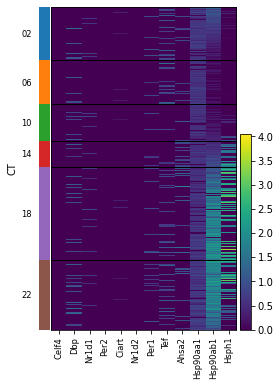

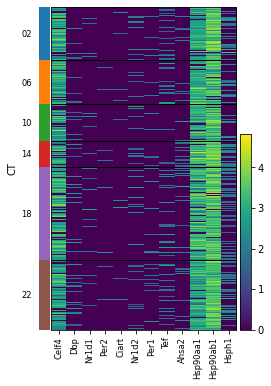

In [20]:
evaluate_single_scn_cluster(adata=adata,cluster='Neurons2',type_genes=type_genes,r_genes=r_genes,gene_regu=0.6,en_regu=0.1,filter_regu=0)
gene_list =['Celf4'] + r_genes2
heatmap_crit(gene_list, 'Neurons2', 'CT')


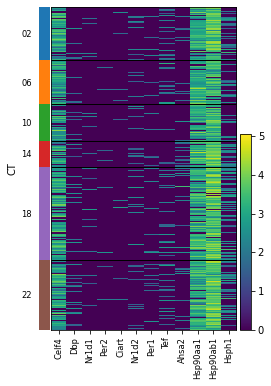

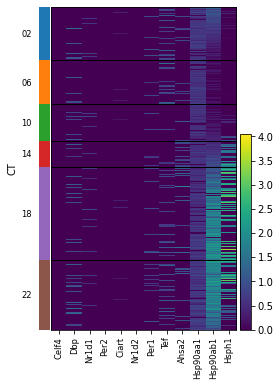

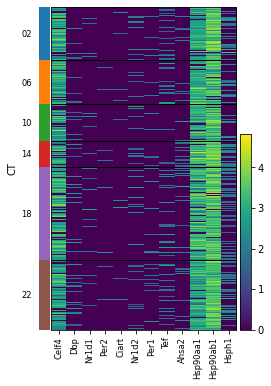

In [21]:
heatmap_crit(gene_list, 'Neurons2', 'CT')

Trying to set attribute `.uns` of view, copying.
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1050: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True
/Users/jonathankarin/PycharmProjects/spctral_jan/datasets.py:1052: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_tmp.var.highly_variable[gene]=True


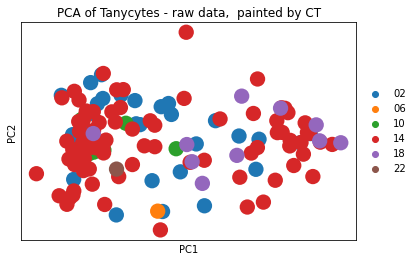

Iteration number: 1function value= 571.4728515565122


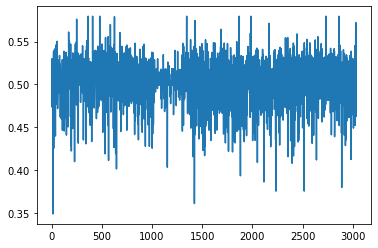

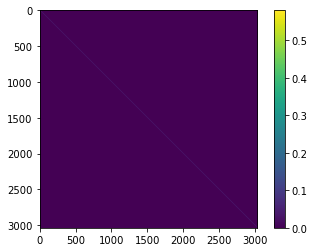

Iteration number: 26function value= 662.7829154063966


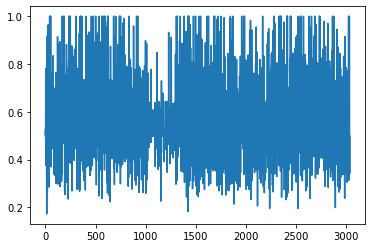

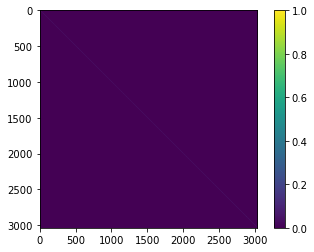

Iteration number: 51function value= 673.8526357214358


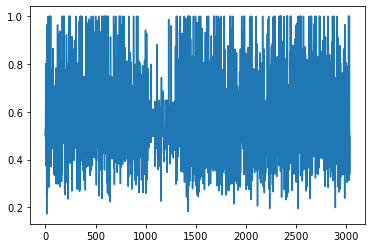

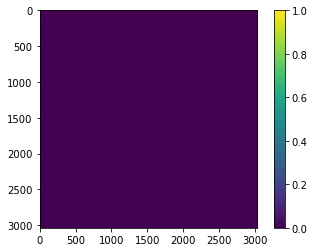

Iteration number: 76function value= 675.0567041818591


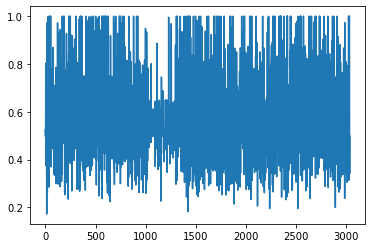

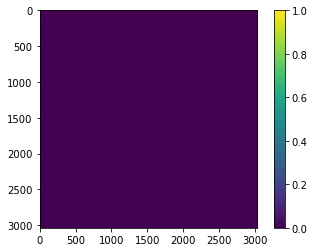

Iteration number: 101function value= 675.2423187317279


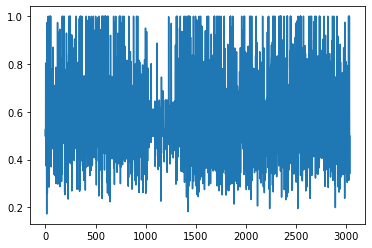

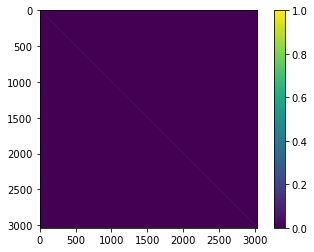

Iteration number: 126function value= 675.2798204276393


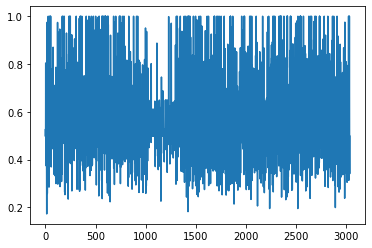

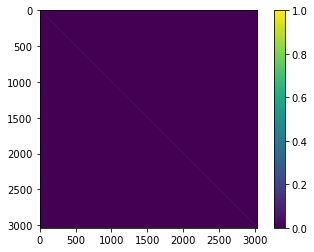

Iteration number: 151function value= 675.2890291221747


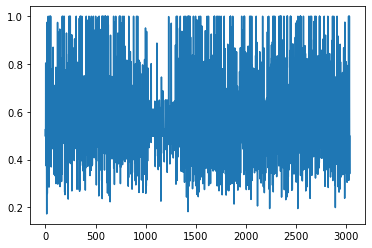

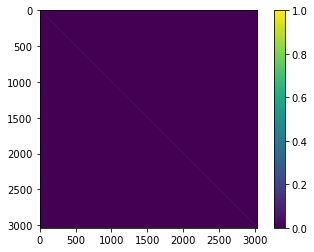

Iteration number: 176function value= 675.2917375658184


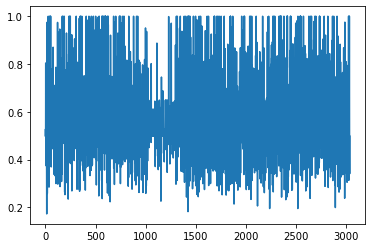

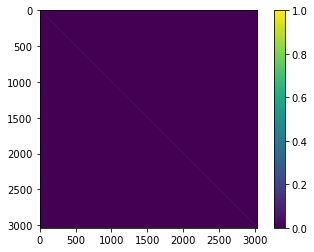

Iteration number: 1 function value: 109.19604699733061
Iteration number: 26 function value: 96.44198780263586


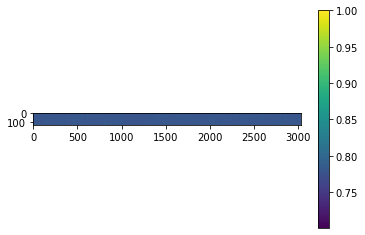

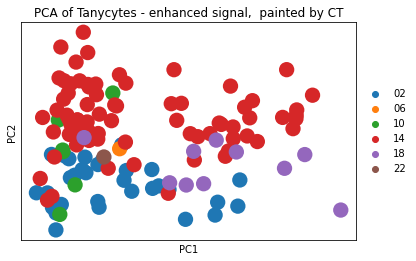

starting filtering
25th Iteration    Loss :: 38.72137375591372 gradient :: 0.9589316291879342
50th Iteration    Loss :: 24.181295083289687 gradient :: 0.6361481566668562


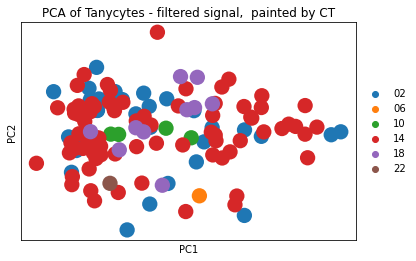

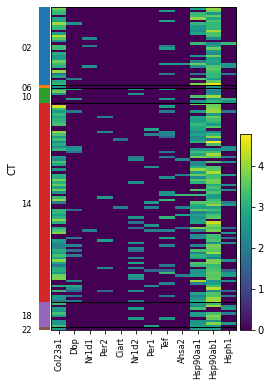

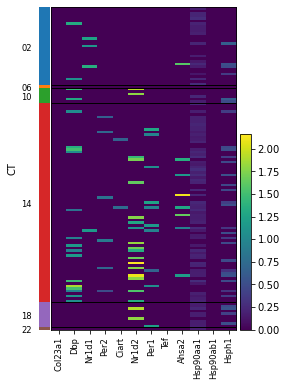

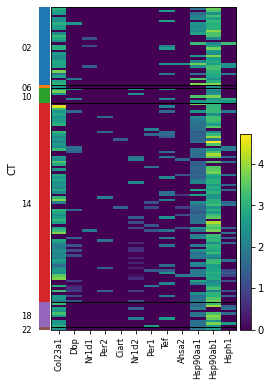

In [22]:
evaluate_single_scn_cluster(adata=adata,cluster='Tanycytes',type_genes=type_genes,r_genes=r_genes,gene_regu=0.8,en_regu=0.05,filter_regu=0)
gene_list =['Col23a1'] + r_genes2
heatmap_crit(gene_list, 'Tanycytes', 'CT')


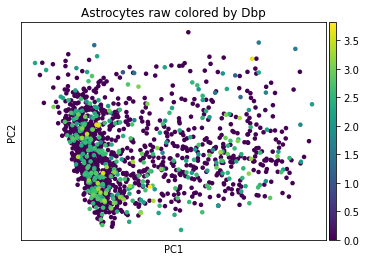

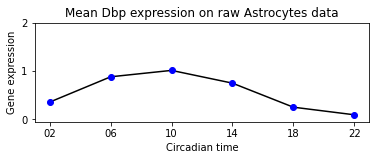

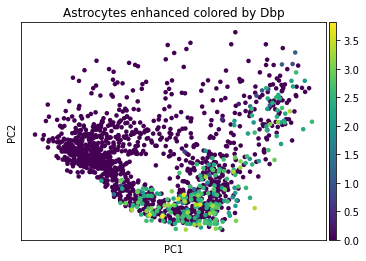

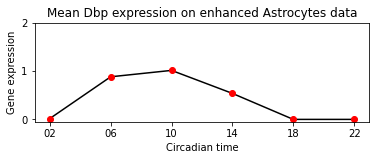

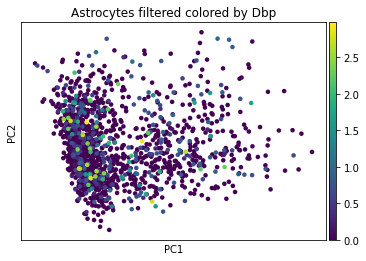

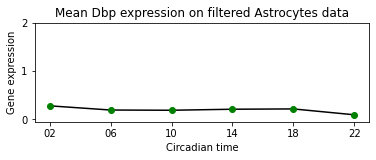

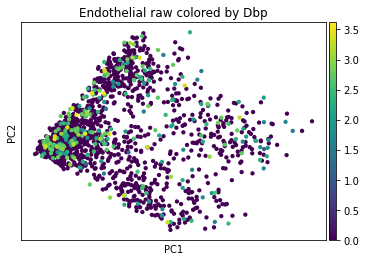

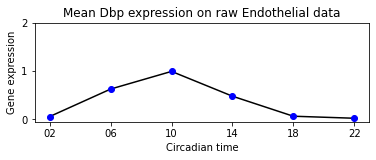

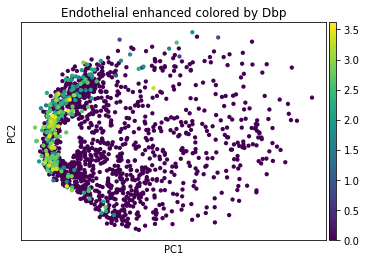

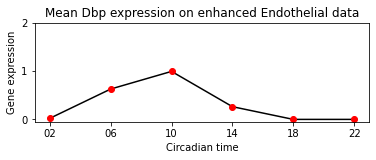

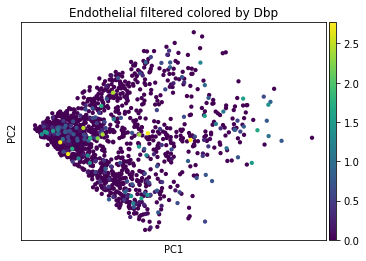

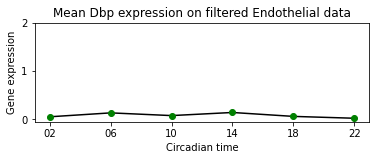

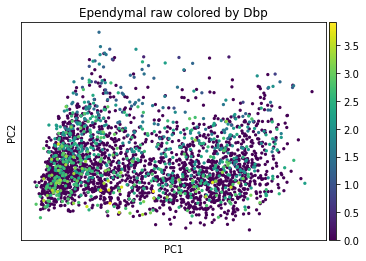

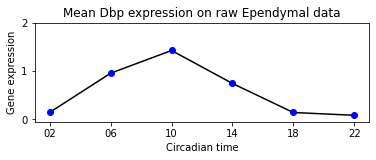

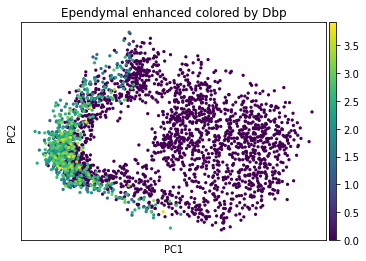

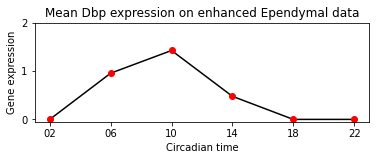

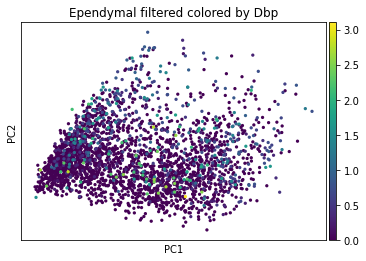

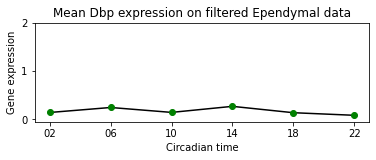

In [40]:
cluster='Astrocytes'
gene_list_2 = ['Dbp']#['Itm2a'] + r_genes2#,'Dbp']#,'Agt']
#adata_raw = sc.read(cluster+"_raw" +".h5ad")
#adata_en = sc.read(cluster+"_en" +".h5ad")
#adata_en_2 = sc.read(cluster+"_en_2" +".h5ad")
#adata_filtered = sc.read(cluster+"_filtered" +".h5ad")
plt_mean_gene('Astrocytes','Dbp' , up_lim=2)#, title=" expression- raw data")
plt_mean_gene('Endothelial','Dbp' , up_lim=2)#, title=" expression- raw data")
plt_mean_gene('Ependymal','Dbp' , up_lim=2)#, title=" expression- raw data")

#plt_mean_gene(adata_raw,gene_list_2)#, title=" expression- raw data")
#plt_mean_gene(adata_en,gene_list_2, title=" expression- enhanced data")
#plt_mean_gene(adata_en_2,gene_list_2, title=" expression- enhanced2 data")
#plt_mean_gene(adata_filtered,gene_list_2, title=" expression- filtered data")


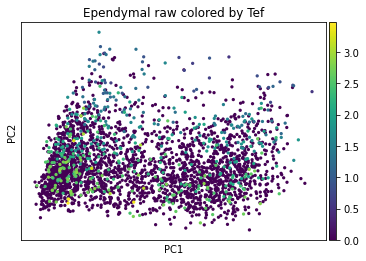

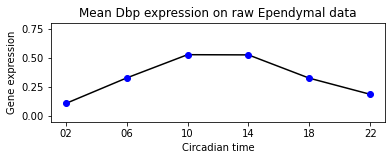

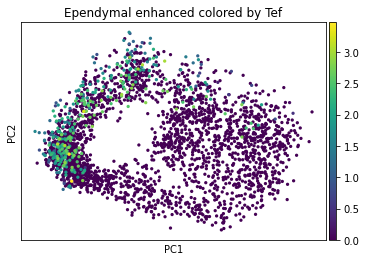

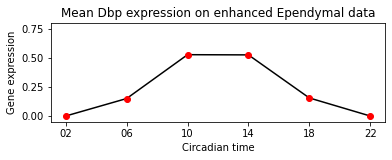

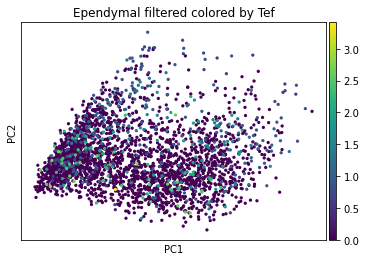

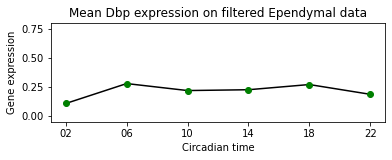

In [14]:
plt_mean_gene('Ependymal','Tef' , up_lim=0.8)#, title=" expression- raw data")

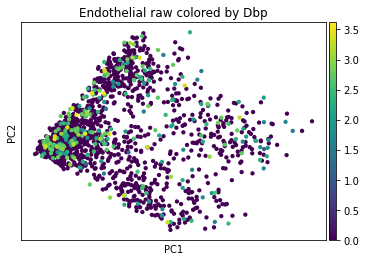

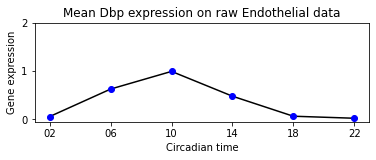

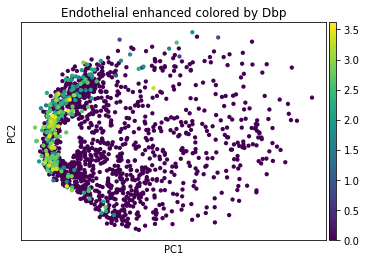

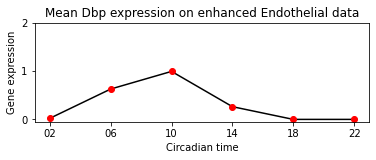

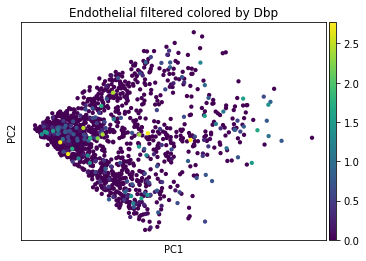

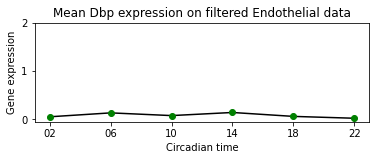

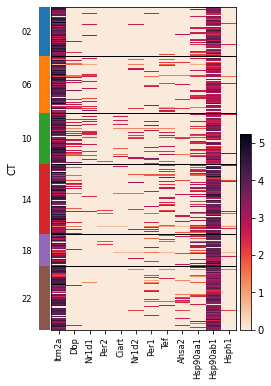

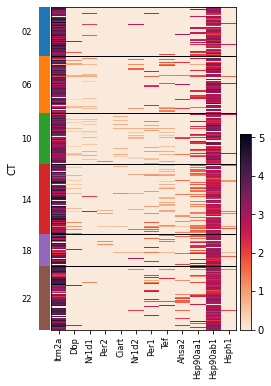

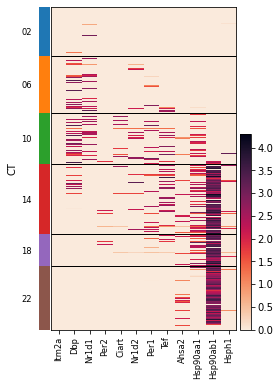

In [21]:
plt_mean_gene('Endothelial','Dbp' , up_lim=2)#, title=" expression- raw data")

heatmap_cluster('Endothelial' ,['Itm2a'] + r_genes2 , cmap='rocket_r')

Oligodendrocytes
calinski_harabasz_score score before : 319.048347189328
calinski_harabasz_score score before : 2.848389997751076
calinski_harabasz_score score before : 9.3278416938999
Neurons1
calinski_harabasz_score score before : 245.7373494873244
calinski_harabasz_score score before : 1.796244735591703
calinski_harabasz_score score before : 15.06907505366404
Ependymal
calinski_harabasz_score score before : 104.92884504991181
calinski_harabasz_score score before : 0.9889521061397104
calinski_harabasz_score score before : 4.297609259178138
Astrocytes
calinski_harabasz_score score before : 95.57383538119653
calinski_harabasz_score score before : 0.6297593305278418
calinski_harabasz_score score before : 2.5381988358317846
Endothelial
calinski_harabasz_score score before : 45.55293624063425
calinski_harabasz_score score before : 0.570575693598078
calinski_harabasz_score score before : 2.875682236674169
NG2
calinski_harabasz_score score before : 25.486001192565595
calinski_harabasz_score

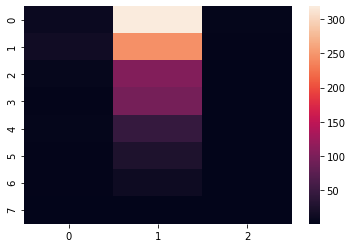

In [22]:
def cb_score_cluster(cluster):
    adata_raw = sc.read("SCN/" + cluster+"_raw" +".h5ad")
    adata_filtered = sc.read("SCN/" + cluster+"_filtered" +".h5ad")
    adata_en = sc.read("SCN/" + cluster+"_en" +".h5ad")
    labels = adata_en.obs["CT"]
    print("calinski_harabasz_score score enhanced : " +str(calinski_harabasz_score(adata_en.X,labels)))
    labels = adata_filtered.obs["CT"]
    print("calinski_harabasz_score score filtered : " +str(calinski_harabasz_score(adata_filtered.X,labels)))
    labels = adata_raw.obs["CT"]
    print("calinski_harabasz_score score raw : " +str(calinski_harabasz_score(adata_raw.X,labels)))
    return np.array([calinski_harabasz_score(adata_raw.X,labels),calinski_harabasz_score(adata_en.X,labels),calinski_harabasz_score(adata_filtered.X,labels)])
    pass

def silhouette_score_cluster(cluster):
    adata_raw = sc.read("SCN/" + cluster+"_raw" +".h5ad")
    adata_filtered = sc.read("SCN/" + cluster+"_filtered" +".h5ad")
    adata_en = sc.read("SCN/" + cluster+"_en" +".h5ad")
    labels = adata_en.obs["CT"]
    print("silhouette_score score enhanced : " +str(silhouette_score(adata_en.X,labels)))
    labels = adata_filtered.obs["CT"]
    print("silhouette_score score filtered : " +str(silhouette_score(adata_filtered.X,labels)))
    labels = adata_raw.obs["CT"]
    print("silhouette_score score raw : " +str(silhouette_score(adata_raw.X,labels)))
    return np.array([silhouette_score(adata_raw.X,labels),silhouette_score(adata_en.X,labels),silhouette_score(adata_filtered.X,labels)])
    pass

def heatmap_cluster(cluster,gene_list_2 , cmap='RdBu_r'):
    adata_raw = sc.read("SCN/" + cluster+"_raw" +".h5ad")
    adata_filtered = sc.read("SCN/" + cluster+"_filtered" +".h5ad")
    adata_en = sc.read("SCN/" + cluster+"_en" +".h5ad")
    sc.pl.heatmap(adata_raw, gene_list_2, groupby='CT' ,cmap=cmap )#,title = "Heatmap of cell type marker, circadian and protein folding genes- " + cluster)#, swap_axes=True)
    sc.pl.heatmap(adata_filtered, gene_list_2, groupby='CT', cmap=cmap)#, swap_axes=True)
    sc.pl.heatmap(adata_en, gene_list_2, groupby='CT', cmap=cmap)#, swap_axes=True)
    pass

clusters = [
    'Oligodendrocytes','Neurons1','Ependymal', 'Astrocytes',
    'Endothelial','NG2',
    'Microglia','Tanycytes']
res = np.zeros((len(clusters),3))
for i, cluster in enumerate(clusters):
    print(cluster)
    res[i,:]=cb_score_cluster(cluster)
ax = sns.heatmap(res)
plt.show()


Neurons1
silhouette_score score before : 0.01605171678835523
silhouette_score score before : -0.025861347687148793
silhouette_score score before : -0.008480015
Astrocytes
silhouette_score score before : 0.014399694792107502
silhouette_score score before : -0.011676293113980416
silhouette_score score before : -0.00673823
Ependymal
silhouette_score score before : 0.008697973005905945
silhouette_score score before : -0.00470567227542937
silhouette_score score before : -0.005259818
Oligodendrocytes
silhouette_score score before : 0.007791002497094341
silhouette_score score before : -0.010258308916197072
silhouette_score score before : -0.005954149
NG2
silhouette_score score before : 0.005323266734736891
silhouette_score score before : -0.011476782222853548
silhouette_score score before : -0.003235372
Endothelial
silhouette_score score before : 0.0011751939294789998
silhouette_score score before : -0.008017492380918515
silhouette_score score before : -0.0036489656
Microglia
silhouette_score

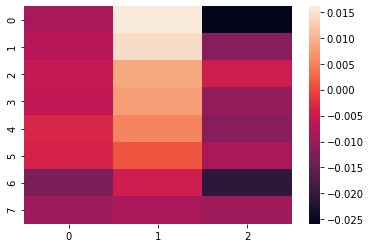

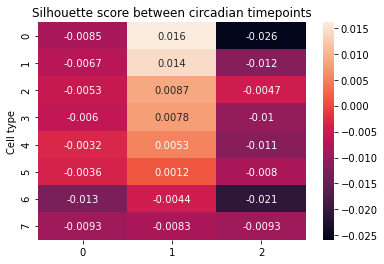

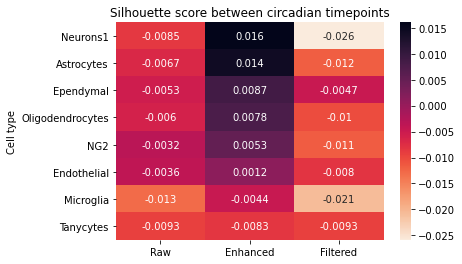

In [25]:
clusters = [
    'Neurons1','Astrocytes',
    'Ependymal','Oligodendrocytes', 'NG2',
    'Endothelial',
    'Microglia','Tanycytes']
res = np.zeros((len(clusters),3))
for i, cluster in enumerate(clusters):
    print(cluster)
    res[i,:]=silhouette_score_cluster(cluster)
ax = sns.heatmap(res)
plt.show()
sns.color_palette("tab10")

ax = sns.heatmap(res,annot=True).set(title= "Silhouette score between circadian timepoints", ylabel='Cell type')

df = pd.DataFrame(res, index=clusters, columns=['Raw','Enhanced','Filtered'])
sns.color_palette("tab10")

plt.show()
ax = sns.heatmap(df,annot=True , cmap='rocket_r').set(title= "Silhouette score between circadian timepoints", ylabel='Cell type')
plt.show()


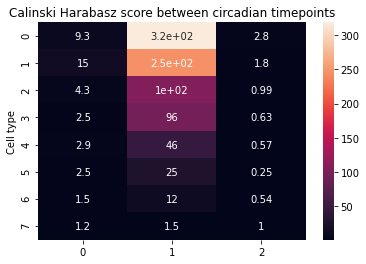

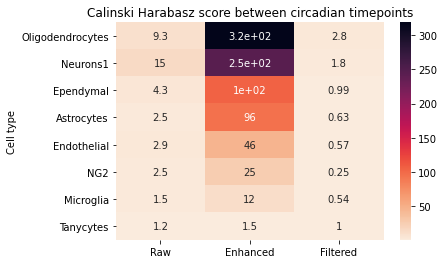

In [17]:
sns.color_palette("tab10")

ax = sns.heatmap(res,annot=True).set(title= "Calinski Harabasz score between circadian timepoints", ylabel='Cell type')

df = pd.DataFrame(res, index=clusters, columns=['Raw','Enhanced','Filtered'])
sns.color_palette("tab10")

plt.show()
ax = sns.heatmap(df,annot=True , cmap='rocket_r').set(title= "Calinski Harabasz score between circadian timepoints", ylabel='Cell type')
plt.show()


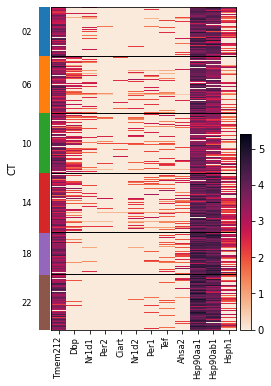

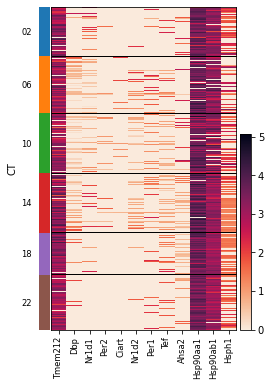

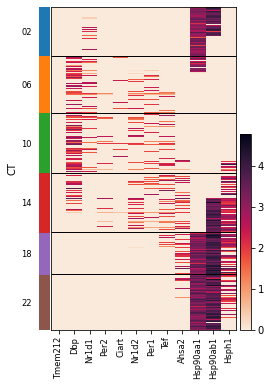

In [96]:
gene_list =['Tmem212'] + r_genes2

heatmap_cluster('Ependymal' ,gene_list , cmap='rocket_r')